In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("mnist_train.csv",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 785)

In [5]:
img=df.iloc[0,1:].values

In [6]:
img.size

784

In [7]:
pic=img.reshape(28,28)

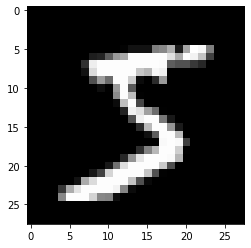

In [8]:
from matplotlib import pyplot as plt
plt.imshow(pic)
plt.gray()
plt.show()

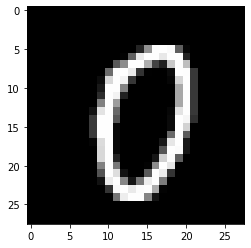

In [9]:
img=df.iloc[1000,1:].values
pic=img.reshape(28,28)
plt.imshow(pic)
plt.gray()
plt.show()

In [10]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [11]:
x.shape

(60000, 784)

In [12]:
y.shape

(60000,)

In [13]:
# scale features

In [14]:
x=x/255

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.utils import to_categorical
from livelossplot import PlotLossesKerasTF

In [16]:
y_encoded=to_categorical(y)

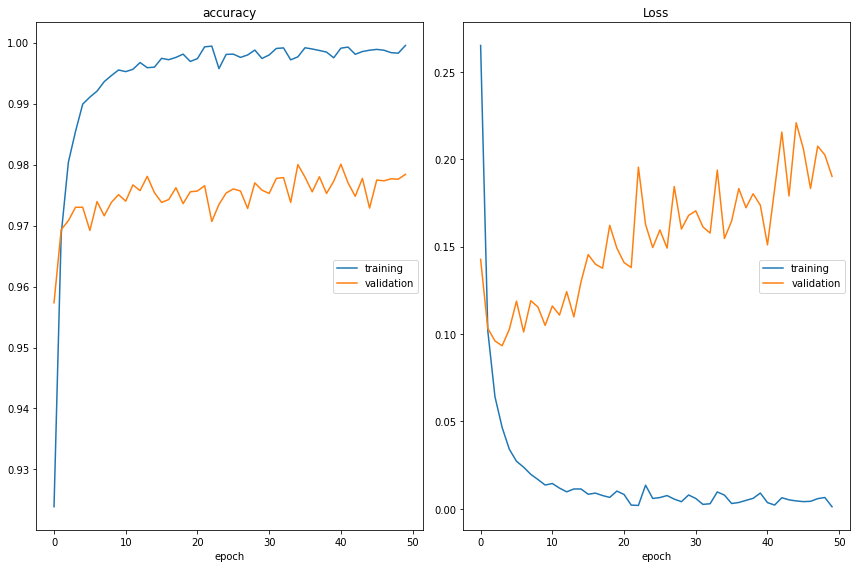

accuracy
	training         	 (min:    0.924, max:    1.000, cur:    1.000)
	validation       	 (min:    0.957, max:    0.980, cur:    0.978)
Loss
	training         	 (min:    0.001, max:    0.265, cur:    0.001)
	validation       	 (min:    0.093, max:    0.221, cur:    0.190)
704/704 [==============================] - 3s 5ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.1902 - val_accuracy: 0.9784


In [17]:
mnist_model=Sequential()
mnist_model.add(Input(shape=(784,))) 
mnist_model.add(Dense(256,activation='relu'))
mnist_model.add(Dense(128,activation='relu'))
mnist_model.add(Dense(10,activation='softmax'))
mnist_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mnist_model.fit(x,y_encoded,epochs=50,batch_size=64,validation_split=0.25,callbacks=[PlotLossesKerasTF()])

In [18]:
from sklearn.metrics import classification_report

In [19]:
mnist_model.predict(x)

array([[0.0000000e+00, 1.3333570e-24, 4.6968203e-31, ..., 1.5706853e-36,
        9.0370359e-24, 7.4792945e-22],
       [1.0000000e+00, 7.5655287e-36, 1.4840165e-23, ..., 3.2272548e-28,
        8.0401923e-31, 3.3659828e-27],
       [2.4827045e-28, 1.6961819e-18, 1.3467214e-21, ..., 5.5201699e-22,
        5.9639712e-14, 4.9254767e-12],
       ...,
       [0.0000000e+00, 1.2230162e-31, 0.0000000e+00, ..., 0.0000000e+00,
        2.0256937e-25, 5.7509172e-22],
       [1.4819376e-19, 1.6514119e-19, 5.6774192e-21, ..., 3.6305430e-24,
        1.6738030e-23, 4.0859972e-23],
       [2.4882000e-16, 2.7308446e-17, 1.8052251e-18, ..., 3.9961067e-19,
        1.0000000e+00, 1.8593364e-16]], dtype=float32)

In [20]:
y_pred=mnist_model.predict(x).argmax(axis=1)

In [21]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      0.99      5958
           3       1.00      0.99      0.99      6131
           4       0.99      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       0.99      1.00      1.00      5918
           7       1.00      0.99      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



In [22]:
testData=pd.read_csv("mnist_test.csv",header=None)

In [23]:
testData.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
x_test=testData.iloc[:,1:]
y_test=testData.iloc[:,0]

In [25]:
x_test=x_test/255
y_test_pred=mnist_model.predict(x_test).argmax(axis=1)

In [26]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

